In [1]:
import numpy as np
import pandas as pd
import glob
import h5py
import os
import cv2
import math
import time
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

from tqdm import tqdm

# Data type evaluation
* [numpy.iinfo()](https://numpy.org/doc/stable/reference/generated/numpy.iinfo.html)
* [numpy.finfo()](https://numpy.org/doc/stable/reference/generated/numpy.finfo.html)

In [2]:
intInfo = np.iinfo(np.uint8)
print("float info")
print("- bits\t\t", f"{intInfo.bits} bits")
print("- range\t\t",f"{intInfo.min} to {intInfo.max}")

float info
- bits		 8 bits
- range		 0 to 255


In [3]:
# ref: 
floatInfo = np.finfo(np.float16)
print("float info")
print("- bits\t\t", f"{floatInfo.bits} bits")
print("- range\t\t",f"{floatInfo.min} to {floatInfo.max}")
print("- precision\t",f"{floatInfo.precision} decimal digits "  )

float info
- bits		 16 bits
- range		 -65504.0 to 65504.0
- precision	 3 decimal digits 


# loading data into np.array 

In [4]:
# loading labels from csv file
df = pd.read_csv("Datasets/labels.csv")

# create dictionary of unique breeds with its respective id
# sort the list as required by evaluation on the test set
breeds = sorted(df.breed.unique())
dict_breeds = dict(zip(breeds, range(len(breeds))))

# add duplicate column
df["breed_id"] = df.breed
# convert duplicated column as unique id
df = df.replace({"breed_id":dict_breeds})

print("Shape\t\t: {}".format(df.shape))
print("Unique labels\t: {}".format(len(breeds)))

Shape		: (10222, 3)
Unique labels	: 120


In [5]:
# check if dictionary is in order
dict_breeds

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [6]:
# to make sure the breed_id has already been sorted to alphabetical order
df.head()

id             breed  breed_id
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull        19
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo        37
2  001cdf01b096e06d78e9e5112d419397          pekinese        85
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick        15
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever        49

In [7]:
INPUT_SHAPE = (299,299,3)

In [8]:
data = []
labels = []

# collect all files from directory into a list
image_files_train = [f for f in glob.glob("Datasets/train" + "/**/*", recursive=True) if not os.path.isdir(f)]
print("{} files found!".format(len(image_files_train)))

# create groud-truth label from the image path
print("loading images")
t = time.time()
for img in tqdm(image_files_train):
    img_file = os.path.basename(img)
    name = img_file.split(".")[0]

    # check if image file has a record in given labels
    result = df.loc[df['id'] == name]
    if result.empty:
        print("LABEL NOT FOUND: {}".format(name))
        continue
    else:
        # reading of image 
        #image = cv2.imread(img)
        #image = cv2.resize(image, (INPUT_SHAPE[0], INPUT_SHAPE[1]))
        #image = img_to_array(image)
        image_ = load_img(img,target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]))
        image = np.asarray(image_)
        data.append(image)
        
        # read respective unique breed id from result 
        label = result['breed_id'].iloc[0]
        labels.append([label])
# one-hot the to categorical
labels_oh = to_categorical(labels)       
print(f'Time taken to load images: {time.time()-t}')

# pre-processing (normalisation)
print("pre-processing")
t = time.time()
# convert data type to uint8 and do preprocessing later
data = np.array(data, dtype=np.uint8) #/ 255.0
labels = np.array(labels, dtype=np.uint8)
labels_oh = np.array(labels_oh, dtype=np.uint8)
print(f'Time taken to pre-processing: {time.time()-t}')

print('x_data shape:', data.shape)
print('y_data shape:', labels.shape)
print('y_data_one_hot shape:', labels_oh.shape)

  0%|                                                                                        | 0/10222 [00:00<?, ?it/s]

10222 files found!
loading images


100%|████████████████████████████████████████████████████████████████████████████| 10222/10222 [03:25<00:00, 49.83it/s]


Time taken to load images: 206.1271402835846
pre-processing
Time taken to pre-processing: 151.69341826438904
x_data shape: (10222, 299, 299, 3)
y_data shape: (10222, 1)
y_data_one_hot shape: (10222, 120)


In [9]:
data[50]

array([[[176, 163, 146],
        [157, 144, 127],
        [148, 135, 118],
        ...,
        [109,  94,  99],
        [ 76,  60,  70],
        [ 76,  58,  70]],

       [[168, 155, 138],
        [148, 135, 118],
        [150, 137, 120],
        ...,
        [100,  85,  88],
        [ 64,  49,  56],
        [ 87,  70,  80]],

       [[149, 133, 117],
        [126, 113,  96],
        [144, 131, 114],
        ...,
        [108,  94,  93],
        [ 72,  57,  60],
        [ 67,  50,  56]],

       ...,

       [[ 92,  75,  65],
        [ 87,  70,  60],
        [ 76,  62,  51],
        ...,
        [253, 241, 217],
        [254, 242, 220],
        [255, 244, 222]],

       [[ 89,  72,  62],
        [ 86,  69,  59],
        [ 77,  63,  52],
        ...,
        [253, 240, 223],
        [251, 238, 221],
        [249, 236, 220]],

       [[ 85,  68,  58],
        [ 87,  70,  60],
        [ 83,  69,  58],
        ...,
        [255, 244, 228],
        [253, 239, 226],
        [249, 235, 222]]

In [10]:
labels[50]

array([2], dtype=uint8)

In [11]:
labels_oh[50]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [12]:
def convert_size(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

def nparray_info(header, nparr):
    print(header)
    print("-  shape\t", nparr.shape)
    print("-  dtype\t", nparr.dtype)
    print("- nbytes\t", f"{nparr.nbytes} ({convert_size(nparr.nbytes)})")
    

In [13]:
# print out shape, dtype and data size
nparray_info("Images", data)
print()
nparray_info("Labels", labels)
print()
nparray_info("Labels One Hot", labels_oh)

Images
-  shape	 (10222, 299, 299, 3)
-  dtype	 uint8
- nbytes	 2741571066 (2.55 GB)

Labels
-  shape	 (10222, 1)
-  dtype	 uint8
- nbytes	 10222 (9.98 KB)

Labels One Hot
-  shape	 (10222, 120)
-  dtype	 uint8
- nbytes	 1226640 (1.17 MB)


### loading and saving with .npz
* [np.save()](https://numpy.org/doc/stable/reference/generated/numpy.save.html)
* [np.savez()](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)
* [np.savez_compressed()](https://numpy.org/doc/stable/reference/generated/numpy.savez_compressed.html)
* [np.lib.format](https://numpy.org/doc/stable/reference/generated/numpy.lib.format.html)





In [14]:
# saving
saving_path = "./Datasets/preprocessed_data_{}x{}.npz".format(INPUT_SHAPE[0], INPUT_SHAPE[1])

In [15]:
print("Saving to npz file")
# ensure directory is created before save data file
os.makedirs(os.path.dirname(saving_path), exist_ok=True)
t = time.time()
np.savez_compressed(saving_path, X=data, Y=labels, Y_oh=labels_oh)
print(f'Time taken to save compressed data: {time.time()-t}')

Saving to npz file
Time taken to save compressed data: 126.15233373641968


In [16]:
# test the loading of npz file
print("Loading from npz file")
t = time.time()
loaded = np.load(saving_path)
print(loaded.files)
loaded_X = loaded["X"]
loaded_Y = loaded["Y"]
loaded_Y_oh = loaded["Y_oh"]
print(f'Time taken to load compressed data: {time.time()-t}')

Loading from npz file
['X', 'Y', 'Y_oh']
Time taken to load compressed data: 56.62363409996033


In [17]:
# print out shape, dtype and data size
nparray_info("Images (npz)", loaded_X)
print()
nparray_info("Labels (npz)", loaded_Y)
print()
nparray_info("Labels One Hot(npz)", loaded_Y_oh)

Images (npz)
-  shape	 (10222, 299, 299, 3)
-  dtype	 uint8
- nbytes	 2741571066 (2.55 GB)

Labels (npz)
-  shape	 (10222, 1)
-  dtype	 uint8
- nbytes	 10222 (9.98 KB)

Labels One Hot(npz)
-  shape	 (10222, 120)
-  dtype	 uint8
- nbytes	 1226640 (1.17 MB)


In [18]:
loaded_Y[50]

array([2], dtype=uint8)

In [19]:
loaded_Y_oh[50]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

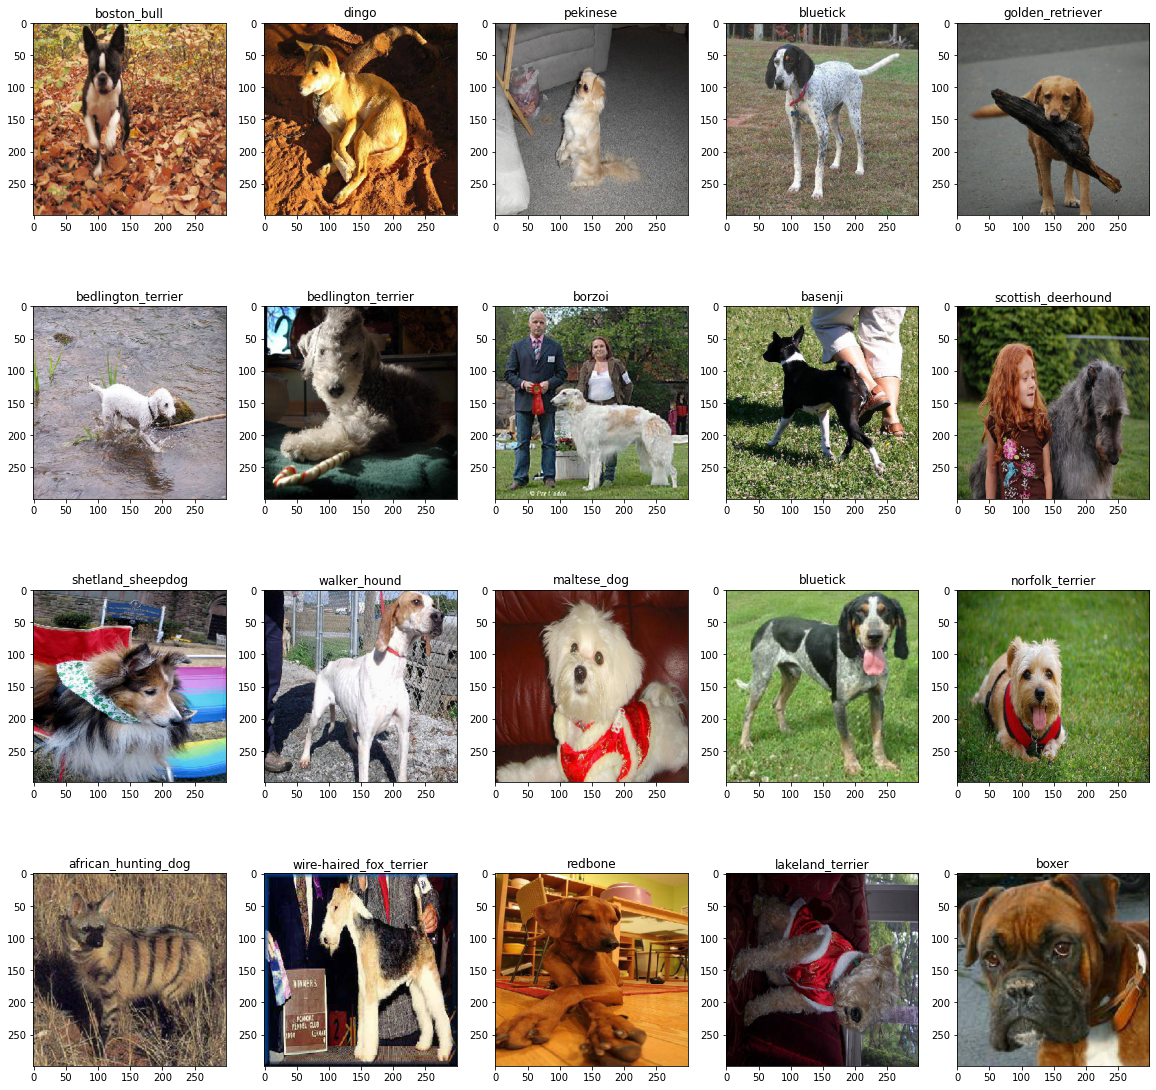

In [20]:
# check the data
N = 20

plt.figure(figsize=(20,20))
for i in range(N):
    ax = plt.subplot(int(N/5),5,i+1)
    plt.title(breeds[np.where(loaded_Y_oh[i]==1)[0][0]])
    if loaded_X.dtype==np.uint8:
        plt.imshow(loaded_X[i])
    else:
        plt.imshow(loaded_X[i].astype('float32'))

## Do likewise for the test dataset but w/o any label

In [19]:
INPUT_SHAPE = (299,299,3)

In [20]:
data_test = []

# collect all files from directory into a list
image_files_test = [f for f in glob.glob("Datasets/test" + "/**/*", recursive=True) if not os.path.isdir(f)]
print("{} files found!".format(len(image_files_test)))

# create groud-truth label from the image path
print("loading images")
t = time.time()
for img in tqdm(image_files_test):
    img_file = os.path.basename(img)
    name = img_file.split(".")[0]

    image_ = load_img(img,target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    image = np.asarray(image_)
    data_test.append(image)
     
print(f'Time taken to load images: {time.time()-t}')

# pre-processing (normalisation)
print("pre-processing")
t = time.time()
data_test = np.array(data_test, dtype=np.uint8)
#labels = np.array(labels, dtype=np.uint8)
print(f'Time taken to pre-processing: {time.time()-t}')

print('x_data shape:', data_test.shape)
#print('y_data shape:', labels.shape)

  0%|                                                                                | 2/10357 [00:00<10:32, 16.38it/s]

10357 files found!
loading images


100%|████████████████████████████████████████████████████████████████████████████| 10357/10357 [01:58<00:00, 87.28it/s]


Time taken to load images: 118.68622970581055
pre-processing
Time taken to pre-processing: 78.65255427360535
x_data shape: (10357, 299, 299, 3)


In [21]:
data_test[50]

array([[[ 56,  56,  56],
        [ 56,  56,  56],
        [ 37,  37,  37],
        ...,
        [ 34,  35,  30],
        [ 57,  57,  55],
        [ 57,  57,  55]],

       [[ 39,  39,  39],
        [ 39,  39,  39],
        [ 20,  20,  20],
        ...,
        [  7,   8,   3],
        [ 25,  25,  23],
        [ 25,  25,  23]],

       [[ 37,  37,  37],
        [ 37,  37,  37],
        [ 18,  18,  18],
        ...,
        [ 12,  13,   8],
        [ 26,  26,  24],
        [ 26,  26,  24]],

       ...,

       [[197, 165, 186],
        [197, 165, 186],
        [243, 208, 228],
        ...,
        [133, 162, 194],
        [128, 157, 189],
        [128, 157, 189]],

       [[162, 137, 158],
        [162, 137, 158],
        [228, 199, 219],
        ...,
        [136, 165, 197],
        [128, 157, 189],
        [128, 157, 189]],

       [[212, 194, 208],
        [212, 194, 208],
        [212, 190, 203],
        ...,
        [143, 172, 202],
        [139, 168, 198],
        [139, 168, 198]]

In [22]:
# print out shape, dtype and data size
nparray_info("Images", data_test)

Images
-  shape	 (10357, 299, 299, 3)
-  dtype	 uint8
- nbytes	 2777778471 (2.59 GB)


In [23]:
# saving
saving_path = "./Datasets/preprocessed_data_test_{}x{}.npz".format(INPUT_SHAPE[0], INPUT_SHAPE[1])

print("Saving to npz file")
# ensure directory is created before save data file
os.makedirs(os.path.dirname(saving_path), exist_ok=True)
t = time.time()
np.savez_compressed(saving_path, X=data_test)
print(f'Time taken to save compressed data: {time.time()-t}')

Saving to npz file
Time taken to save compressed data: 90.0721275806427


In [24]:
# test the loading of npz file
print("Loading from npz file")
t = time.time()
loaded = np.load(saving_path)
print(loaded.files)
loaded_X_test = loaded["X"]
print(f'Time taken to load compressed data: {time.time()-t}')

Loading from npz file
['X']
Time taken to load compressed data: 18.230474710464478


In [25]:
# print out shape, dtype and data size
nparray_info("Images (npz)", loaded_X_test)

Images (npz)
-  shape	 (10357, 299, 299, 3)
-  dtype	 uint8
- nbytes	 2777778471 (2.59 GB)


In [26]:
loaded_X_test[50][0]

array([[56, 56, 56],
       [56, 56, 56],
       [37, 37, 37],
       [36, 36, 36],
       [36, 36, 36],
       [45, 45, 45],
       [45, 45, 45],
       [42, 42, 42],
       [40, 40, 40],
       [40, 40, 40],
       [44, 44, 44],
       [43, 43, 43],
       [43, 43, 43],
       [43, 43, 43],
       [43, 43, 43],
       [45, 45, 45],
       [46, 46, 46],
       [46, 46, 46],
       [44, 44, 44],
       [44, 44, 44],
       [40, 40, 40],
       [37, 37, 37],
       [37, 37, 37],
       [39, 39, 39],
       [39, 39, 39],
       [41, 41, 41],
       [39, 39, 39],
       [39, 39, 39],
       [41, 41, 41],
       [41, 41, 41],
       [43, 43, 43],
       [41, 41, 41],
       [41, 41, 41],
       [37, 37, 37],
       [33, 33, 33],
       [33, 33, 33],
       [31, 31, 31],
       [31, 31, 31],
       [31, 31, 31],
       [27, 27, 27],
       [27, 27, 27],
       [29, 29, 29],
       [29, 29, 29],
       [32, 32, 32],
       [35, 35, 35],
       [35, 35, 35],
       [37, 37, 37],
       [37, 3

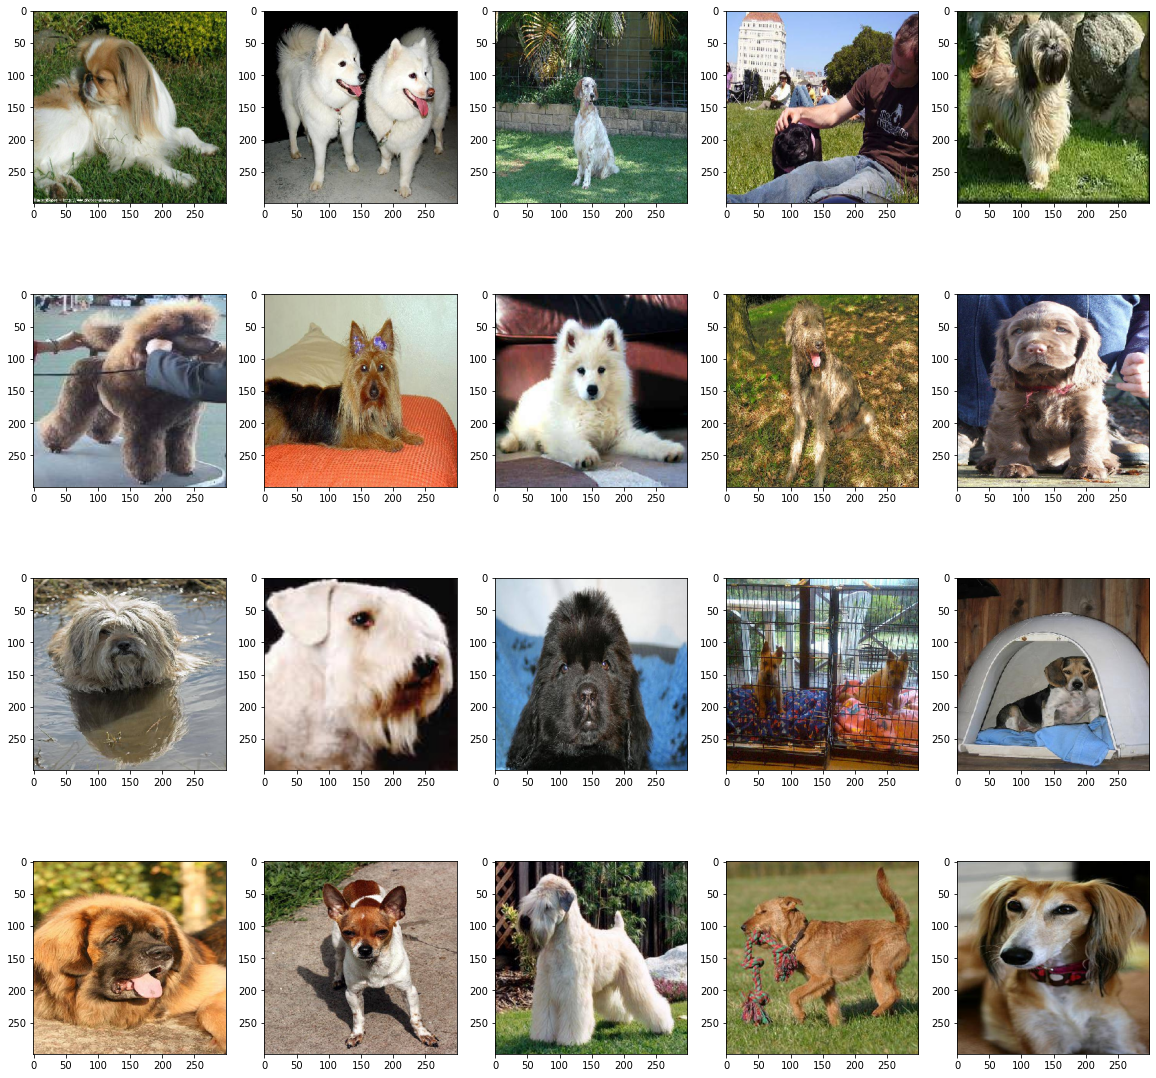

In [27]:
# check the data
N = 20

plt.figure(figsize=(20,20))
for i in range(N):
    ax = plt.subplot(int(N/5),5,i+1)
    if loaded_X.dtype==np.uint8:
        plt.imshow(loaded_X_test[i])
    else:
        plt.imshow(loaded_test_X[i].astype('float32'))